# DataCamp - Data Scientist Career Track (Python)

##  Machine Learning with the Experts: School Budgets


In [1]:
data_folder = "C:/Users/Admin/Dropbox/Python/ficheiros/DataCamp/DataCamp - Machine Learning with the Experts_School Budgets/"

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer
from sklearn.feature_selection import chi2, SelectKBest

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.pipeline import FeatureUnion


### o código do modelo final está tb aqui:
    
https://github.com/datacamp/course-resources-ml-with-experts-budgets/blob/master/notebooks/1.0-full-model.ipynb

##    CHAPTER 1  - Exploring the raw data


#### Exercício 1 - Introducing the challenge

In [4]:
#vídeo

# problem - school budgets -> predict the probabilities of belonging to a certain class 

Exercício 2

In [5]:
# What type of machine learning problem is this?
# Answer: supervised learning

Exercício 3

In [6]:
# What is the goal of the algorithm?
# Answer: Classification, because predicted probabilities will be used to select a label class

#### Exercício 4 - Exploring the data

In [7]:
%%script false
#vídeo

# Load and preview the data
# we have text and numerical data
# info()
# describe()

In [1]: df.info()
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1560 entries, 198 to 101861
Data columns (total 25 columns):
Function                  1560 non-null object
Use                       1560 non-null object
Sharing                   1560 non-null object
Reporting                 1560 non-null object
Student_Type              1560 non-null object
Position_Type             1560 non-null object
Object_Type               1560 non-null object
Pre_K                     1560 non-null object
Operating_Status          1560 non-null object
Object_Description        1461 non-null object
Text_2                    382 non-null object
SubFund_Description       1183 non-null object
Job_Title_Description     1131 non-null object
Text_3                    677 non-null object
Text_4                    193 non-null object
Sub_Object_Description    364 non-null object
Location_Description      874 non-null object
FTE                       449 non-null float64
Function_Description      1340 non-null object
Facility_or_Department    252 non-null object
Position_Extra            1026 non-null object
Total                     1542 non-null float64
Program_Description       1192 non-null object
Fund_Description          819 non-null object
Text_1                    1132 non-null object
dtypes: float64(2), object(23)
memory usage: 316.9+ KB

Couldn't find program: 'false'


Exercício 5

In [8]:
%%script false
# Loading the data
df = pd.read_csv('TrainingData.csv', index_col=0)

df.info()

# Answer: 1560 rows, 26 columns, 1131 non-null entries in Job_Title_Description.

Couldn't find program: 'false'


Exercício 6

In [9]:
%%script false
# Summarizing the data

# You'll notice that there are two numeric columns, called FTE and Total.

# ---> FTE: Stands for "full-time equivalent". If the budget item is associated to an employee, this number tells us the 
# percentage of full-time that the employee works. A value of 1 means the associated employee works for the school 
# full-time. A value close to 0 means the item is associated to a part-time or contracted employee.

# ---> Total: Stands for the total cost of the expenditure. This number tells us how much the budget item cost.

# Print the summary statistics
print(df.describe())

# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Create the histogram of the non-null 'FTE' column.
plt.hist(df['FTE'].dropna())

# Add title and labels
plt.title('Distribution of %full-time \n employee works')
plt.xlabel('% of full-time')
plt.ylabel('num employees')

# Display the histogram
plt.show()

Couldn't find program: 'false'


In [10]:
%%script false

df.describe()

################################################
<script.py> output:
                  FTE         Total
    count  449.000000  1.542000e+03
    mean     0.493532  1.446867e+04
    std      0.452844  7.916752e+04
    min     -0.002369 -1.044084e+06
    25%           NaN           NaN
    50%           NaN           NaN
    75%           NaN           NaN
    max      1.047222  1.367500e+06

Couldn't find program: 'false'


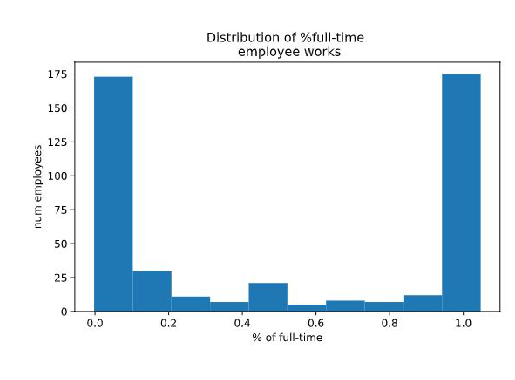

In [11]:
imagem = plt.imread(data_folder + "histogram_1.jpg")
plt.axis('off')
plt.subplots_adjust(left=0, bottom=-0.2, right=1.2, top=1, wspace=0, hspace=0)
plt.imshow(imagem)
plt.show()

# The high variance in expenditures makes sense (some purchases are cheap some are expensive). 
# Also, it looks like the FTE column is bimodal. That is, there are some part-time and some full-time employees.

#### Exercício 7 - Looking at the datatypes

In [12]:
%%script false
#vídeo

# Encode labels as categories

#  - ML algorithms works on numbers, not strings --> need a numeric representation of these strings
#  - Strings can be  slow compared to numbers
#   - In pandas, ‘category’ dtype encodes categorical data numerically  --> Can speed up code

sample_df.label = sample_df.label.astype('category')   # ---> Name: label, dtype: category 

# Dummy variable encoding:
dummies = pd.get_dummies(sample_df[['label']], prefix_sep='_')

dummies.head(2)
Out[5]:
        label_a label_b
0          1       0
1          0       1

# Lambda functions:
# - Alternative to ‘def’ syntax
# - Easy way to make simple, one-line functions
square = lambda x: x*x
square(2)
Out[6]: 4

# Encode labels as categories
# ● In the sample dataframe, we only have one relevant column
# ● In the budget data, there are multiple columns that need to be made categorical 

categorize_label = lambda x: x.astype('category') 
sample_df['label'] = sample_df[['label']].apply(categorize_label, axis=0)

# não era melhor assim?
sample_df['label'] = sample_df['label'].astype('category')

Couldn't find program: 'false'


Exercício 8

In [13]:
%%script false
# Exploring datatypes in pandas

df.dtypes.value_counts()

############################
Out[3]: 
object     23
float64     2
dtype: int64

# How many columns with dtype object are in the data? answer: 23

Couldn't find program: 'false'


Exercício 9

In [14]:
%%script false
# Encode the labels as categorical variables

# Remember, your ultimate goal is to predict the probability that a certain label is attached to a budget line item. 
# There are 9 columns of labels in the dataset. Each of these columns is a category that has many possible values it can
# take. The 9 labels have been loaded into a list called LABELS.

# You will notice that every label is encoded as an object datatype. 
# ---> Because *category datatypes* are much more **efficient** your task is to convert the labels to category types 
#      using the .astype() method.


# Define the lambda function: categorize_label
categorize_label = lambda x: x.astype('category')

# Convert df[LABELS] to a categorical type
df[LABELS] = df[LABELS].apply(categorize_label)

# Print the converted dtypes
print(df[LABELS].dtypes)

#################################################
<script.py> output:
    Function            category
    Use                 category
    Sharing             category
    Reporting           category
    Student_Type        category
    Position_Type       category
    Object_Type         category
    Pre_K               category
    Operating_Status    category
    dtype: object

Couldn't find program: 'false'


Exercício 10

In [15]:
%%script false
# Counting unique labels

# There are over 100 unique labels. In this exercise, you will explore this fact by counting and plotting the number 
# of unique values for each category of label.

# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Calculate number of unique values for each label: num_unique_labels
num_unique_labels = df[LABELS].apply(pd.Series.nunique)

# Plot number of unique values for each label
num_unique_labels.plot(kind='bar')

# Label the axes
plt.xlabel('Labels')
plt.ylabel('Number of unique values')

# Display the plot
plt.show()

Couldn't find program: 'false'


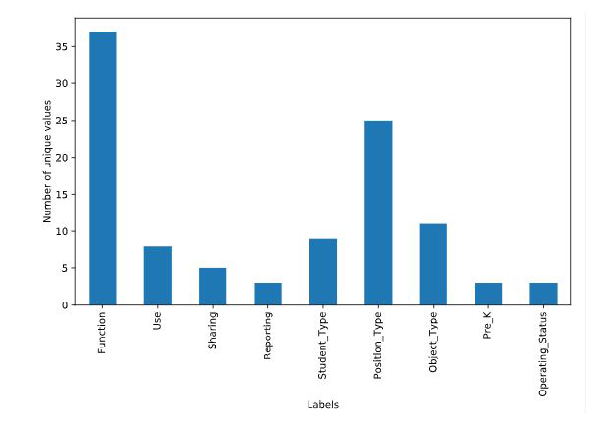

In [16]:
imagem = plt.imread(data_folder + "LABELS.jpg")
plt.axis('off')
plt.subplots_adjust(left=0, bottom=-0.4, right=1.4, top=1, wspace=0, hspace=0)
plt.imshow(imagem)
plt.show()

#### Exercício 11 - How do we measure success?

In [17]:
%%script false
#vídeo

# How do we measure success?

# Accuracy can be misleading when classes are imbalanced
# ● Legitimate email: 99%, Spam: 1%
# ● Model that never predicts spam will be 99% accurate!

# Metric used in this problem: log loss
# ● It is a loss function
# ● Measure of error
# ● Want to minimize the error (unlike accuracy)

# Log loss binary classification
# ● Actual value: y = {1=yes, 0=no}
# ● Prediction (probability that the value is 1): p

logloss = − np.mean( yi*log(pi) + (1 − yi)*log(1 − pi) )     # i= 1-->N

# Log loss binary classification: example
logloss(N=1) = y*log(p) + (1 − y)*log(1 − p)

# True label = 0
# ● Model confidently predicts 1 (with p = 0.90)
# ● Log loss = log(1 - 0.9) = log(0.1) = 2.30

# True label = 1
# ● Model predicts 0 (with p = 0.50)
# ● Log loss = log(1 - 0.5) = log(0.5) = 0.69
# ● --->Better to be less confident than confident and wrong


# Computing log loss with NumPy
import numpy as np

def compute_log_loss(predicted, actual, eps=1e-14):
    """ 
    Computes the logarithmic loss between predicted and actual when these are 1D arrays.
    
    :param predicted: The predicted probabilities as floats between 0-1
    :param actual: The actual binary labels. Either 0 or 1.
    :param eps (optional): log(0) is inf, so we need to offset our predicted values slightly by eps from 0 or 1.
    """
    predicted = np.clip(predicted, eps, 1 - eps)
    loss = -1 * np.mean(actual * np.log(predicted) + (1 - actual) * np.log(1 - predicted))
    
    return loss


compute_log_loss(predicted=0.9, actual=0)
Out[1]: 2.3025850929940459
    
compute_log_loss(predicted=0.5, actual=1)
Out[2]: 0.69314718055994529


Couldn't find program: 'false'


Exercício 12

In [18]:
# Penalizing highly confident wrong answers

# Suppose you have the following 3 examples:

# A: y = 1,  p = 0.85
# B: y = 0,  p = 0.99
# C: y = 0,  p = 0.51

# Select the ordering of the examples which corresponds to the lowest to highest log loss scores. 
# y is an indicator of whether the example was classified correctly. 

# answer: Lowest: A, Middle: C, Highest: B.

Exercício 13 --- log loss function ---

In [19]:
# Computing log loss with NumPy

def compute_log_loss(predicted, actual, eps=1e-14):
    """ 
    Computes the logarithmic loss between predicted and actual when these are 1D arrays.
    
    :param predicted: The predicted probabilities as floats between 0-1
    :param actual: The actual binary labels. Either 0 or 1.
    :param eps (optional): log(0) is inf, so we need to offset our predicted values slightly by eps from 0 or 1.
    """
    
    predicted = np.clip(predicted, eps, 1 - eps)
    loss = -1 * np.mean(actual * np.log(predicted) + (1 - actual) * np.log(1 - predicted))
    
    return loss

In [20]:
%%script false

# 5 one-dimensional numeric arrays simulating different types of predictions have been pre-loaded: 
#     actual_labels, correct_confident, correct_not_confident, wrong_not_confident, and wrong_confident

correct_confident = [0.95, 0.95, 0.95, 0.95, 0.95, 0.05, 0.05, 0.05, 0.05, 0.05]

correct_not_confident = [0.65, 0.65, 0.65, 0.65, 0.65, 0.35, 0.35, 0.35, 0.35, 0.35]

wrong_not_confident = [0.35, 0.35, 0.35, 0.35, 0.35, 0.65, 0.65, 0.65, 0.65, 0.65]

wrong_confident = [0.05, 0.05, 0.05, 0.05, 0.05, 0.95, 0.95, 0.95, 0.95, 0.95]

actual_labels = [1., 1., 1., 1., 1., 0., 0., 0., 0., 0.]


# Compute and print log loss for 1st case
correct_confident = compute_log_loss(correct_confident, actual_labels)

# Compute log loss for 2nd case
correct_not_confident = compute_log_loss(correct_not_confident, actual_labels)

# Compute and print log loss for 3rd case
wrong_not_confident = compute_log_loss(wrong_not_confident, actual_labels)

# Compute and print log loss for 4th case
wrong_confident = compute_log_loss(wrong_confident, actual_labels)

# Compute and print log loss for actual labels
actual_labels = compute_log_loss(actual_labels, actual_labels)


Couldn't find program: 'false'


In [21]:
%%script false

print("Log loss, correct and confident: {}".format(correct_confident))
print("Log loss, correct and not confident: {}".format(correct_not_confident)) 
print("Log loss, wrong and not confident: {}".format(wrong_not_confident)) 
print("Log loss, wrong and confident: {}".format(wrong_confident)) 
print("Log loss, actual labels: {}".format(actual_labels)) 

######################################################################
<script.py> output:
    Log loss, correct and confident: 0.05129329438755058
    Log loss, correct and not confident: 0.4307829160924542
    Log loss, wrong and not confident: 1.049822124498678
    Log loss, wrong and confident: 2.9957322735539904
    Log loss, actual labels: 9.99200722162646e-15
        
# Log loss penalizes highly confident wrong answers much more than any other type. 
# This is a good metric to use on your models. 

Couldn't find program: 'false'


# CHAPTER 2 - Creating a simple first model

#### Exercício 1 - It's time to build a model

In [22]:
%%script false
#vídeo

# It's time to build a model
# ● Always a good approach to start with a very simple model
# ● Gives a sense of how challenging the problem is
# ● Many more things can go wrong in complex models
# ● How much signal can we pull out using basic methods?

# Train basic model on numeric data only
# ● Want to go from raw data to predictions quickly
# ● ---> we'll see/use Multi-class logistic regression
# ● Train classifier on each label separately and use those to predict
# ● Format predictions and save to csv
# ● --> Compute log loss score

# Splitting the multi-class dataset
# ● Recall: Train-test split
#     ---> Will not work here
#     ---> May end up with labels in test set that never appear in training set

# Solution: StratifiedShuffleSplit
# ● Only works with a single target variable
# ● We have many target (!) variables
# ● multilabel_train_test_split() ----> assures that all the classes are represented in both the train and test set 
#                                       ver abaixo a função

# Splitting the data
data_to_train = df[NUMERIC_COLUMNS].fillna(-1000)   # para responder a NaN diferentemente dos 0's

labels_to_use = pd.get_dummies(df[LABELS])

X_train, X_test, y_train, y_test = multilabel_train_test_split(data_to_train, labels_to_use, size=0.2, seed=123)

# Training the model
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier    # ---------> a usar quando são mais do que 2 classes no target

clf = OneVsRestClassifier(LogisticRegression())

clf.fit(X_train, y_train)

# OneVsRestClassifier:
# ● Treats each column of y independently
# ● Fits a separate classifier for each of the columns


Couldn't find program: 'false'


Exercício 2

In [23]:
def multilabel_sample(y, size=1000, min_count=5, seed=None):
    
    """ Takes a matrix of binary labels 'y' and returns the indices for a sample of size 'size' if 'size' > 1 or 
        'size' * len(y) if size =< 1.
        The sample is guaranteed to have > 'min_count' of each label.
    """
    
    try:
        if (np.unique(y).astype(int) != np.array([0, 1])).any():
            raise ValueError()
    except (TypeError, ValueError):
        raise ValueError('multilabel_sample only works with binary indicator matrices')

    if (y.sum(axis=0) < min_count).any():
        raise ValueError('Some classes do not have enough examples. Change min_count if necessary.')

    if size <= 1:
        size = np.floor(y.shape[0] * size)

    if y.shape[1] * min_count > size:
        msg = "Size less than number of columns * min_count, returning {} items instead of {}."
        warn(msg.format(y.shape[1] * min_count, size))
        size = y.shape[1] * min_count

    rng = np.random.RandomState(seed if seed is not None else np.random.randint(1))

    if isinstance(y, pd.DataFrame):
        choices = y.index
        y = y.values
    else:
        choices = np.arange(y.shape[0])

    sample_idxs = np.array([], dtype=choices.dtype)

    # first, guarantee > min_count of each label
    for j in range(y.shape[1]):
        label_choices = choices[y[:, j] == 1]
        label_idxs_sampled = rng.choice(label_choices, size=min_count, replace=False)
        sample_idxs = np.concatenate([label_idxs_sampled, sample_idxs])

    sample_idxs = np.unique(sample_idxs)

    # now that we have at least min_count of each, we can just random sample
    sample_count = int(size - sample_idxs.shape[0])

    # get sample_count indices from remaining choices
    remaining_choices = np.setdiff1d(choices, sample_idxs)
    remaining_sampled = rng.choice(remaining_choices,
                                   size=sample_count,
                                   replace=False)

    return np.concatenate([sample_idxs, remaining_sampled])

######################################################################################################################

def multilabel_sample_dataframe(df, labels, size, min_count=5, seed=None):
    """ Takes a dataframe `df` and returns a sample of size `size` where all
        classes in the binary matrix `labels` are represented at
        least `min_count` times.
    """
    idxs = multilabel_sample(labels, size=size, min_count=min_count, seed=seed)
    return df.loc[idxs]

######################################################################################################################

def multilabel_train_test_split(X, Y, size, min_count=5, seed=None):
    
    """ Takes a features matrix 'X' and a label matrix 'Y' and returns (X_train, X_test, Y_train, Y_test) 
        where all classes in Y are represented at least `min_count` times.
    """
    index = Y.index if isinstance(Y, pd.DataFrame) else np.arange(Y.shape[0])

    test_set_idxs = multilabel_sample(Y, size=size, min_count=min_count, seed=seed)
    
    train_set_idxs = np.setdiff1d(index, test_set_idxs)

    test_set_mask = index.isin(test_set_idxs)
    train_set_mask = ~test_set_mask

    return (X[train_set_mask], X[test_set_mask], Y[train_set_mask], Y[test_set_mask])


In [24]:
%%script false
# Setting up a train-test split in scikit-learn

# The first step is to split the data into a training set and a test set. Some labels don't occur very often, but we
# want to make sure that they appear in both the training and the test sets. We provide a function that will make sure 
# at least min_count examples of each label appear in each split: multilabel_train_test_split.

NUMERIC_COLUMNS = ['FTE', 'Total']

LABELS = ['Function', 'Use', 'Sharing', 'Reporting', 'Student_Type', 'Position_Type', 'Object_Type', 'Pre_K',
          'Operating_Status']

# Create the new DataFrame: numeric_data_only
numeric_data_only = df[NUMERIC_COLUMNS].fillna(-1000)

# Get labels and convert to dummy variables: label_dummies
label_dummies = pd.get_dummies(df[LABELS])

# Create training and test sets
X_train, X_test, y_train, y_test = multilabel_train_test_split(numeric_data_only, label_dummies, size=0.2, seed=123)

# Print the info
print("X_train info:")
print(X_train.info())

print("\nX_test info:")  
print(X_test.info())

print("\ny_train info:")  
print(y_train.info())

print("\ny_test info:")  
print(y_test.info()) 

Couldn't find program: 'false'


In [25]:
%%script false

<script.py> output:
    X_train info:
    <class 'pandas.core.frame.DataFrame'>
    Int64Index: 1040 entries, 198 to 101861
    Data columns (total 2 columns):
    FTE      1040 non-null float64
    Total    1040 non-null float64
    dtypes: float64(2)
    memory usage: 24.4 KB
    None
    
    X_test info:
    <class 'pandas.core.frame.DataFrame'>
    Int64Index: 520 entries, 209 to 448628
    Data columns (total 2 columns):
    FTE      520 non-null float64
    Total    520 non-null float64
    dtypes: float64(2)
    memory usage: 12.2 KB
    None
    
    y_train info:
    <class 'pandas.core.frame.DataFrame'>
    Int64Index: 1040 entries, 198 to 101861
    Columns: 104 entries, Function_Aides Compensation to Operating_Status_PreK-12 Operating
    dtypes: float64(104)
    memory usage: 853.1 KB
    None
    
    y_test info:
    <class 'pandas.core.frame.DataFrame'>
    Int64Index: 520 entries, 209 to 448628
    Columns: 104 entries, Function_Aides Compensation to Operating_Status_PreK-12 Operating
    dtypes: float64(104)
    memory usage: 426.6 KB
    None

Couldn't find program: 'false'


Exercício 3

In [26]:
%%script false
# Training a model

# Before you train! Remember, we're ultimately going to be using logloss to score our model, so don't worry too much about
# the accuracy here. Keep in mind that you're throwing away all of the text data in the dataset - that's by far most of 
# the data! So don't get your hopes up for a killer performance just yet. We're just interested in getting things up and
# running at the moment.

# Import classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

# Create the DataFrame: numeric_data_only
numeric_data_only = df[NUMERIC_COLUMNS].fillna(-1000)

# Get labels and convert to dummy variables: label_dummies
label_dummies = pd.get_dummies(df[LABELS])

# Create training and test sets
X_train, X_test, y_train, y_test = multilabel_train_test_split(numeric_data_only,
                                                               label_dummies,
                                                               size=0.2, 
                                                               seed=123)

# Instantiate the classifier: clf
clf = OneVsRestClassifier(LogisticRegression())

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Print the accuracy
print("Accuracy: {}".format(clf.score(X_test, y_test)))

#####################################################################

<script.py> output:
    Accuracy: 0.0

# The good news is that your workflow didn't cause any errors. The bad news is that your model scored the lowest possible 
# accuracy: 0.0! But hey, you just threw away ALL of the text data in the budget. Later, you won't. Before you add the text
# data, let's see how the model does when scored by log loss.

Couldn't find program: 'false'


#### Exercício 4 - Making predictions

In [27]:
%%script false
#vídeo

# Making predictions

# Predicting on holdout data

holdout = pd.read_csv('HoldoutData.csv', index_col=0)

holdout = holdout[NUMERIC_COLUMNS].fillna(-1000)

predictions = clf.predict_proba(holdout)  # we want the probabilities

# Predicting on holdout data
# ● If .predict() was used instead:
# ● Output would be 0 or 1
# ● Log loss penalizes being confident and wrong
# ● Worse performance compared to .predict_proba()

# Submitting your predictions as a csv to the competition ---> All formtting can be done with the pandas to_csv function

prediction_df = pd.DataFrame(columns=pd.get_dummies(df[LABELS], prefix_sep='__').columns, index=holdout.index,
                             data=predictions)

prediction_df.to_csv('predictions.csv')

score = score_submission(pred_path='predictions.csv')


Couldn't find program: 'false'


Exercício 5

In [28]:
%%script false
# Use your model to predict values on holdout data

# Instantiate the classifier: clf
clf = OneVsRestClassifier(LogisticRegression())

# Fit it to the training data
clf.fit(X_train, y_train)

# Load the holdout data: holdout
holdout = pd.read_csv('HoldoutData.csv', index_col=0)

# Generate predictions: predictions
predictions = clf.predict_proba(holdout[NUMERIC_COLUMNS].fillna(-1000))


Couldn't find program: 'false'


Exercício 6

In [29]:
%%script false
# Writing out your results to a csv for submission

# When interpreting your log loss score, keep in mind that the score will change based on the number of samples tested. 
# To get a sense of how this very basic model performs, compare your score to the DrivenData benchmark model performance: 
# 2.0455, which merely submitted uniform probabilities for each class.

# Generate predictions: predictions
predictions = clf.predict_proba(holdout[NUMERIC_COLUMNS].fillna(-1000))

# Format predictions in DataFrame: prediction_df
prediction_df = pd.DataFrame(columns=pd.get_dummies(df[LABELS]).columns,
                             index=holdout.index,
                             data=predictions)


# Save prediction_df to csv
prediction_df.to_csv('predictions.csv')

# Submit the predictions for scoring: score
score = score_submission(pred_path='predictions.csv')  #função criada por eles tb

# Print score
print('Your model, trained with numeric data only, yields logloss score: {}'.format(score))

##########################################

# Your model, trained with numeric data only, yields logloss score: 1.9067227623381413


# Even though your basic model scored 0.0 accuracy, it nevertheless performs better than the benchmark score of 2.0455.
# You've now got the basics down and have made a first pass at this complicated supervised learning problem. It's time to 
# step up your game and incorporate the text data.

Couldn't find program: 'false'


#### Exercício 7 - A very brief introduction to NLP

In [30]:
%%script false
#vídeo

# A very brief introduction to NLP

# ● Data for NLP:
#   - Text, documents, speech, …
# ● Tokenization
#   - Splittng a string into segments
#   - Store segments as list
# ● Example: ‘Natural Language Processing’
#    —> [‘Natural’, ‘Language’, ‘Processing’]

# Tokens and token patterns
# ● Tokenize on whitespace
#   PETRO-VEND FUEL AND FLUIDS
#   PETRO-VEND | FUEL | AND | FLUIDS
# ● Tokenize on whitespace and punctuation
#   PETRO-VEND FUEL AND FLUIDS
#   PETRO | VEND | FUEL | AND | FLUIDS

# Bag of words representation
# ● Count the number of times a particular token appears
# ● This is called “Bag of words” representation
#   - Count the number of times a word was pulled out of the bag
# ● This approach discards information about word order
# ● “Red, not blue” is the same as “blue, not red”

# 1-gram, 2-gram, …, n-gram  ---> a more sofisticated approach - diferentes agregações das palavras


Couldn't find program: 'false'


Exercício 8

In [31]:
%%script false
# Tokenizing text

# Often, tokens are separated by whitespace. But we can specify other delimiters as well. For example, if we decided to
# tokenize on punctuation, then any punctuation mark would be treated like a whitespace. How we tokenize text in our 
# DataFrame can affect the statistics we use in our model.

# How many tokens (1-grams) are in the string

# "Title I - Disadvantaged Children/Targeted Assistance"

# if we tokenize on punctuation?

# answer: 6

Couldn't find program: 'false'


Exercício 9

In [32]:
%%script false
# Testing your NLP credentials with n-grams

# All 1-grams of the string petro-vend fuel and fluids, tokenized on punctuation:
one_grams = ['petro', 'vend', 'fuel', 'and', 'fluids']

# Determine the sum of the sizes of 1-grams, 2-grams and 3-grams generated by the string petro-vend fuel and fluids, 
# tokenized on punctuation.

# Answer: a soma é igual a 5 + 4 + 3 = 12


Couldn't find program: 'false'


#### Exercício 10 - Representing text numerically

In [33]:
%%script false

#vídeo
from sklearn.feature_extraction.text import CountVectorizer

# Representing text numerically
# ● Bag-of-words
# ● Simple way to represent text in machine learning
# ● Discards information about grammar and word order
# ● Computes frequency of occurrence

# Scikit-learn tools for bag-of-words
# ● CountVectorizer()
# ● Tokenizes all the strings
# ● Builds a ‘vocabulary’
# ● Counts the occurrences of each token in the vocabulary

# Using CountVectorizer() on column of main dataset
from sklearn.feature_extraction.text import CountVectorizer

TOKENS_BASIC = '\\S+(?=\\s+)'

df.Program_Description.fillna('', inplace=True)

vec_basic = CountVectorizer(token_pattern=TOKENS_BASIC)


# Using CountVectorizer() on column of main dataset
vec_basic.fit(df.Program_Description)
   
# CountVectorizer(analyzer='word', binary=False, decode_error='strict',
#  dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
#  lowercase=True, max_df=1.0, max_features=None, min_df=1,
#  ngram_range=(1, 1), preprocessor=None, stop_words=None,
#  strip_accents=None, token_pattern='\\S+(?=\\s+)',
#  tokenizer=None, vocabulary=None)
    
msg = 'There are {} tokens in Program_Description if tokens are any non-whitespace'

print(msg.format(len(vec_basic.get_feature_names())))

# There are 157 tokens in Program_Description if tokens are any nonwhitespace


Couldn't find program: 'false'


Exercício 11

In [34]:
%%script false
# Creating a bag-of-words in scikit-learn

# In this exercise, you'll study the effects of tokenizing in different ways by comparing the bag-of-words representations 
# resulting from different token patterns.

# You will focus on one feature only, the 'Position_Extra' column, which describes any additional information not captured 
# by the 'Position_Type' label.

# For example, in the Shell you can check out the budget item in row 8960 of the data using df.loc[8960]. Looking at the 
# output reveals that this Object_Description is overtime pay. For who? The Position Type is merely "other", but the 
# Position Extra elaborates: "BUS DRIVER". Explore the column further to see more instances. It has a lot of NaN values.

# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Create the token pattern: TOKENS_ALPHANUMERIC
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'

# Fill missing values in df.Position_Extra
df.Position_Extra.fillna('', inplace=True)

# Instantiate the CountVectorizer: vec_alphanumeric
vec_alphanumeric = CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC)

# Fit to the data
vec_alphanumeric.fit(df.Position_Extra)

# Print the number of tokens and first 15 tokens
msg = "There are {} tokens in Position_Extra if we split on non-alpha numeric"
print(msg.format(len(vec_alphanumeric.get_feature_names())))
print(vec_alphanumeric.get_feature_names()[:15])

######################################################################

There are 123 tokens in Position_Extra if we split on non-alpha numeric

# first 15 tokens
['1st', '2nd', '3rd', 'a', 'ab', 'additional', 'adm', 'administrative', 'and', 'any', 'art', 'assessment', 'assistant',
 'asst', 'athletic']

# Treating only alpha-numeric characters as tokens gives you a smaller number of more meaningful tokens.

Couldn't find program: 'false'


Exercício 12

In [35]:
# Combining text columns for tokenization


# In order to get a bag-of-words representation for all of the text data in our DataFrame, you must first convert the text
# data in each row of the DataFrame into a single string.

# In the previous exercise, this wasn't necessary because you only looked at one column of data, so each row was already 
# just a single string. CountVectorizer expects each row to just be a single string, so in order to use all of the text
# columns, you'll need ---> a method to turn a list of strings into a single string.

# ---> In this exercise, you'll complete the function definition 'combine_text_columns()'. 

# When completed, this function will convert all training text data in your DataFrame to a single string per row that can 
# be passed to the vectorizer object and made into a bag-of-words using the .fit_transform() method.

# Note that the function uses NUMERIC_COLUMNS and LABELS to determine which columns to drop. 


# Define combine_text_columns()
def combine_text_columns(data_frame, to_drop=None):
    """ converts all text in each row of data_, to_drop=Noneframe to single vector """
    
    # Drop non-text columns that are in the df
    to_drop = set(to_drop) & set(data_frame.columns.tolist())
    text_data = data_frame.drop(to_drop, axis=1)
    
    # Replace nans with blanks
    text_data.fillna('', inplace=True)
    
    # Join all text items in a row that have a space in between
    return text_data.apply(lambda x: " ".join(x), axis=1)


In [36]:
# Exemplo
airquality = pd.read_csv(data_folder + "airquality.csv")

airquality['adicionei_uma_coluna_texto'] = "hoje se calkhar vai cho\ver"
airquality['adicionei_uma_coluna_texto_2'] = "tudo junto é separado"

print(combine_text_columns(airquality, to_drop=airquality.columns[:-2]).head())  # drop todas as outras

airquality.head()

0    hoje se calkhar vai choer tudo junto é separado
1    hoje se calkhar vai choer tudo junto é separado
2    hoje se calkhar vai choer tudo junto é separado
3    hoje se calkhar vai choer tudo junto é separado
4    hoje se calkhar vai choer tudo junto é separado
dtype: object


,Ozone,Solar.R,Wind,Temp,Month,Day,adicionei_uma_coluna_texto,adicionei_uma_coluna_texto_2
0,41.0,190.0,7.4,67,5,1,hoje se calkhar vai cho er,tudo junto é separado
1,36.0,118.0,8.0,72,5,2,hoje se calkhar vai cho er,tudo junto é separado
2,12.0,149.0,12.6,74,5,3,hoje se calkhar vai cho er,tudo junto é separado
3,18.0,313.0,11.5,62,5,4,hoje se calkhar vai cho er,tudo junto é separado
4,NaN,NaN,14.3,56,5,5,hoje se calkhar vai cho er,tudo junto é separado


Exercício 13

In [37]:
%%script false
# What's in a token?

# Now you will use combine_text_columns to convert all training text data in your DataFrame to a single vector that can be
# passed to the vectorizer object and made into a bag-of-words using the .fit_transform() method.
# You'll compare the effect of tokenizing using any non-whitespace characters as a token and using only alphanumeric 
# characters as a token.

# Import the CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Create the basic token pattern
TOKENS_BASIC = '\\S+(?=\\s+)'

# Create the alphanumeric token pattern
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'

# Instantiate basic CountVectorizer: vec_basic
vec_basic = CountVectorizer(token_pattern=TOKENS_BASIC)

# Instantiate alphanumeric CountVectorizer: vec_alphanumeric
vec_alphanumeric = CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC)

# Create the text vector
text_vector = combine_text_columns(df, to_drop=LABELS + NUMERIC_COLUMNS)

# Fit and transform vec_basic
vec_basic.fit_transform(text_vector)

# Print number of tokens of vec_basic
print("There are {} tokens in the dataset".format(len(vec_basic.get_feature_names())))

# Fit and transform vec_alphanumeric
vec_alphanumeric.fit_transform(text_vector)

# Print number of tokens of vec_alphanumeric
print("There are {} alpha-numeric tokens in the dataset".format(len(vec_alphanumeric.get_feature_names())))

#######################################################################################

There are 1405 tokens in the dataset
There are 1117 alpha-numeric tokens in the dataset


# Notice that tokenizing on alpha-numeric tokens reduced the number of tokens, just as in the last exercise. 
# We'll keep this in mind when building a better model with the Pipeline object next. 


Couldn't find program: 'false'


# Chapter 3 - Improving your model

#### Exercício 1 - Pipelines, feature & text preprocessing

In [38]:
%%script false
#vídeo

# Pipelines, feature & text preprocessing

# The pipeline workflow
# ● Repeatable way to go from raw data to trained model
# ● Pipeline object takes sequential list of steps
#  - Output of one step is input to next step
# ● Each step is a tuple with two elements
#  - Name: string
#  - Transform: obj implementing .fit() and .transform()
# ● Flexible: a step can itself be another pipeline!

# Instantiate simple pipeline with one step
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

pl = Pipeline([('clf', OneVsRestClassifier(LogisticRegression()))])

# Train and test with sample numeric data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(sample_df[['numeric']], pd.get_dummies(sample_df['label']),
                                                    random_state=2)

pl.fit(X_train, y_train)

Out[8]:
Pipeline(steps=[('clf', OneVsRestClassifier(estimator=LogisticRegression(C=1.0,
class_weight=None, dual=False, fit_intercept=True,
 intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
 penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
 verbose=0, warm_start=False),
 n_jobs=1))])

# accuracy
accuracy = pl.score(X_test, y_test)

print('accuracy on numeric data, no nans: ', accuracy)   # accuracy on numeric data, no nans: 0.44

#######################################

# Adding more steps to the pipeline

X_train, X_test, y_train, y_test = train_test_split(sample_df[['numeric', 'with_missing']], 
                                                    pd.get_dummies(sample_df['label']), random_state=2)

pl.fit(X_train, y_train)
"""Traceback (most recent call last):
 ...
ValueError: Input contains NaN, infinity or a value too large for
dtype('float64').
"""

# Preprocessing numeric features with missing data
 from sklearn.preprocessing import Imputer

pl = Pipeline([('imp', Imputer()), ('clf', OneVsRestClassifier(LogisticRegression()))])   

# adicionar Imputer()
# em exemplos anteriores: Imputer(missing_values='NaN', strategy='mean', axis=0))     #strategy='mean' --> default

pl.fit(X_train, y_train)

accuracy = pl.score(X_test, y_test)

print('accuracy on all numeric, incl nans: ', accuracy)    # accuracy on all numeric, incl nans: 0.48


Couldn't find program: 'false'


Exercício 2

In [39]:
%%script false
# Instantiate pipeline

# The sample data is stored in the DataFrame, sample_df, which has three kinds of feature data: numeric, text, and numeric 
# with missing values. It also has a label column with two classes, a and b.
# In this exercise, your job is to instantiate a pipeline that trains using the numeric column of the sample data.

# Import Pipeline
from sklearn.pipeline import Pipeline

# Import other necessary modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

# Split and select numeric data only, no nans 
X_train, X_test, y_train, y_test = train_test_split(sample_df[['numeric']],
                                                    pd.get_dummies(sample_df['label']), 
                                                    random_state=22)

# Instantiate Pipeline object: pl
pl = Pipeline([('clf', OneVsRestClassifier(LogisticRegression()))])

# Fit the pipeline to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on sample data - numeric, no nans: ", accuracy)   # Accuracy on sample data - numeric, no nans:  0.62


Couldn't find program: 'false'


Exercício 3

In [40]:
%%script false
# Preprocessing numeric features

# By default, the imputer transformer replaces NaNs with the mean value of the column. 

# Import the Imputer object
from sklearn.preprocessing import Imputer

# Create training and test sets using only numeric data
X_train, X_test, y_train, y_test = train_test_split(sample_df[['numeric', 'with_missing']],
                                                    pd.get_dummies(sample_df['label']), random_state=2)

# Insantiate Pipeline object: pl
pl = Pipeline([('imp', Imputer()), ('clf', OneVsRestClassifier(LogisticRegression()))])

# Fit the pipeline to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on sample data - all numeric, incl nans: ", accuracy) 
# Accuracy on sample data - all NUMERIC, incl nans:  0.636

# looks like the accuracy has improved because of it! Text data preprocessing is next!

Couldn't find program: 'false'


#### Exercício 4 - Text features and feature unions

In [41]:
%%script false
#vídeo

# Preprocessing TEXT features

from sklearn.feature_extraction.text import CountVectorizer

X_train, X_test, y_train, y_test = train_test_split(sample_df['text'], 
                                                    pd.get_dummies(sample_df['label']), random_state=2)

pl = Pipeline([('vec', CountVectorizer()), ('clf', OneVsRestClassifier(LogisticRegression()))]) # aqui põe-se 'vec' primeiro

pl.fit(X_train, y_train)

Out[4]:
Pipeline(steps=[('vec', CountVectorizer(analyzer='word', binary=False,
decode_error='strict', dtype=<class 'numpy.int64'>, encoding='utf-8',
input='content', lowercase=True, max_df=1.0, max_features=None, min_df=1,
ngram_range=(1, 1), preprocessor=None, stop_words=None, strip_...=None,
solver='liblinear', tol=0.0001, verbose=0, warm_start=False), n_jobs=1))])

# accuracy
accuracy = pl.score(X_test, y_test)
print('accuracy on sample data: ', accuracy)   # accuracy on sample data: 0.64

##########################################################################


# ---> Preprocessing multiple dtypes    (como fazemos para juntar os dados numéricos e os de texto)

# ● Want to use all available features in one pipeline
# ● Problem
#  - Pipeline steps for numeric and text preprocessing can’t follow each other
#  - e.g., output of CountVectorizer can’t be input to Imputer (não sabe como lidar com dados numéricos)
# ● Solution
#  - FunctionTransformer() & FeatureUnion()


# FunctionTransformer

# ● O que faz --> Turns a Python function into an object that a scikit-learn pipeline can understand
# ● We need to write two functions for pipeline preprocessing
#  - Take entire DataFrame, return numeric columns
#  - Take entire DataFrame, return text columns
# ● Can then preprocess numeric and text data in separate pipelines


# Putting it all together

X_train, X_test, y_train, y_test = train_test_split(sample_df[['numeric', 'with_missing', 'text']], 
                                                    pd.get_dummies(sample_df['label']), 
                                                    random_state=2)
    
    
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import FeatureUnion

# FunctionTransformer --> só seleciona as colunas e põem-nas num formato que o Pipeline entende
get_text_data = FunctionTransformer(lambda x: x['text'], validate=False)  # takes a dataframe and returns the column 'text'
get_numeric_data = FunctionTransformer(lambda x: x[['numeric', 'with_missing']], validate=False)  # takes df and ret 'num'

# here it takes the function (dataframe in our case) and transform it into an object (text and numeric columns separately
# in our case) that a sklearn Pipeline can understand.
# These 2 FunctionTransformer objects will let us set up separate pipelines that operate on the selected columns only.

# validate=False -> tell sklearn it does not need to check for NaN's or validate the dtype of the inputs (nós fazemos isso).


# FeatureUnion Text and Numeric Features
# 2)
union = FeatureUnion([('numeric', numeric_pipeline), ('text', text_pipeline)])

# 1)
numeric_pipeline = Pipeline([('selector', get_numeric_data), ('imputer', Imputer())])   
text_pipeline = Pipeline([('selector', get_text_data),('vectorizer', CountVectorizer())])



# Final pipeline
pl = Pipeline([('union', FeatureUnion([('numeric', numeric_pipeline), ('text', text_pipeline)])),  #union
               ('clf', OneVsRestClassifier(LogisticRegression()))                                  #classifier
              ])

 # OU, mais simplesmente

pl = Pipeline([('union', union),                                       #union
               ('clf', OneVsRestClassifier(LogisticRegression()))      #classifier
              ])


Couldn't find program: 'false'


Exercício 5

In [42]:
%%script false
# Preprocessing text features (only)

# Import the CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Split out only the text data
X_train, X_test, y_train, y_test = train_test_split(sample_df['text'],
                                                    pd.get_dummies(sample_df['label']), 
                                                    random_state=456)

# Instantiate Pipeline object: pl
pl = Pipeline([
        ('vec', CountVectorizer()),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

# Fit to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on sample data - just text data: ", accuracy)   # Accuracy on sample data - just text data:  0.808


Couldn't find program: 'false'


Exercício 6

In [43]:
%%script false

# Import FunctionTransformer
from sklearn.preprocessing import FunctionTransformer

# Obtain the text data: get_text_data
get_text_data = FunctionTransformer(lambda x: x['text'], validate=False)      

# Obtain the numeric data: get_numeric_data
get_numeric_data = FunctionTransformer(lambda x: x[['numeric', 'with_missing']], validate=False)

##########################################################################

# Fit and transform the text data: just_text_data
just_text_data = get_text_data.fit_transform(sample_df)

# Fit and transform the numeric data: just_numeric_data
just_numeric_data = get_numeric_data.fit_transform(sample_df)

# Print head to check results
print('Text Data')
print(just_text_data.head())
print('\nNumeric Data')
print(just_numeric_data.head())

#######################################

<script.py> output:
    Text Data
    0           
    1        foo
    2    foo bar
    3           
    4    foo bar
    Name: text, dtype: object

            
    Numeric Data
         numeric  with_missing
    0 -10.856306      4.433240
    1   9.973454      4.310229
    2   2.829785      2.469828
    3 -15.062947      2.852981
    4  -5.786003      1.826475

# You can see in the shell that fit and transform are now available to the selectors. Let's put the selectors to work

Couldn't find program: 'false'


Exercício 7

In [44]:
%%script false
# Multiple types of processing: FeatureUnion

# Import FeatureUnion
from sklearn.pipeline import FeatureUnion

# Split using ALL data in sample_df
X_train, X_test, y_train, y_test = train_test_split(sample_df[['numeric', 'with_missing', 'text']],
                                                    pd.get_dummies(sample_df['label']), 
                                                    random_state=22)

# Create a FeatureUnion with nested pipeline: process_and_join_features
process_and_join_features = FeatureUnion(
    
     transformer_list = [('numeric_features', Pipeline([('selector', get_numeric_data), ('imputer', Imputer())])),
                         ('text_features', Pipeline([('selector', get_text_data), ('vectorizer', CountVectorizer())]))
                        ]
                                        )

# Instantiate nested pipeline: pl
pl = Pipeline([
        ('union', process_and_join_features),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])


# Fit pl to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on sample data - all data: ", accuracy)


# Accuracy on sample data - all data:  0.928 --> mt melhor

Couldn't find program: 'false'


#### Exercício 8 - Choosing a classification model

In [45]:
%%script false
#vídeo

# Main dataset: lots of text

LABELS = ['Function', 'Use', 'Sharing', 'Reporting', 'Student_Type','Position_Type', 'Object_Type', 'Pre_K', 
          'Operating_Status']
    
NON_LABELS = [c for c in df.columns if c not in LABELS]

len(NON_LABELS) - len(NUMERIC_COLUMNS)  # 14


# Using pipeline with the main dataset

df = pd.read_csv('TrainingSetSample.csv', index_col=0)

dummy_labels = pd.get_dummies(df[LABELS])

X_train, X_test, y_train, y_test = multilabel_train_test_split(df[NON_LABELS], dummy_labels, test_size=0.2)

# FunctionTransformer, FeatureUnion and final pipeline
get_text_data = FunctionTransformer(combine_text_columns, validate=False) # aqui juntamos o texto c o combine_text_columns()
get_numeric_data = FunctionTransformer(lambda x: x[NUMERIC_COLUMNS], validate=False)


pl = Pipeline([
     ('union', FeatureUnion([('numeric_features', Pipeline([('selector', get_numeric_data),('imputer', Imputer())])),
                            ('text_features', Pipeline([('selector', get_text_data),('vectorizer', CountVectorizer())]))
                            ])
      ),
     ('clf', OneVsRestClassifier(LogisticRegression()))
              ]) 


pl.fit(X_train, y_train) 


# Flexibility of model step

# ● Is current model the best?
# ● Can quickly try different models with pipelines
#  - Pipeline preprocessing steps unchanged
#  - Edit the model step in your pipeline
#  - Random Forest, Naïve Bayes, k-NN


# Easily try new models using pipeline

from sklearn.ensemble import RandomForestClassifier

pl = Pipeline([
     ('union', FeatureUnion([('numeric_features', Pipeline([('selector', get_numeric_data),('imputer', Imputer())])),
                            ('text_features', Pipeline([('selector', get_text_data),('vectorizer', CountVectorizer())]))
                            ])
      ),
     ('clf', OneVsRestClassifier(RandomForestClassifier()))  # or others
              ]) 


Couldn't find program: 'false'


Exercício 9

In [46]:
%%script false
# Using FunctionTransformer on the main dataset

NUMERIC_COLUMNS = ['FTE', 'Total']
LABELS = ['Function', 'Use', 'Sharing', 'Reporting', 'Student_Type', 'Position_Type', 'Object_Type', 'Pre_K',
          'Operating_Status']

# Import FunctionTransformer
from sklearn.preprocessing import FunctionTransformer

# Get the dummy encoding of the labels
dummy_labels = pd.get_dummies(df[LABELS])

# Get the columns that are features in the original df
NON_LABELS = [c for c in df.columns if c not in LABELS]

# Split into training and test sets
X_train, X_test, y_train, y_test = multilabel_train_test_split(df[NON_LABELS],
                                                               dummy_labels,
                                                               0.2, 
                                                               seed=123)

# Preprocess the text data: get_text_data
get_text_data = FunctionTransformer(combine_text_columns, validate=False)

# Preprocess the numeric data: get_numeric_data
get_numeric_data = FunctionTransformer(lambda x: x[NUMERIC_COLUMNS], validate=False)



Couldn't find program: 'false'


Exercício 10

In [47]:
%%script false
# Add a model to the pipeline

# Complete the pipeline: pl
pl = Pipeline([
    ('union', FeatureUnion(transformer_list = 
              [('numeric_features', Pipeline([('selector', get_numeric_data), ('imputer', Imputer())])),
               ('text_features', Pipeline([('selector', get_text_data), ('vectorizer', CountVectorizer())]))
              ])),
    ('clf', OneVsRestClassifier(LogisticRegression()))
              ])

# Fit to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on budget dataset: ", accuracy)

# Accuracy on budget dataset:  0.20384615384615384

Couldn't find program: 'false'


Exercício 11

In [48]:
%%script false
# Try a different class of model   ----->   RandomForestClassifier

# Import random forest classifer
from sklearn.ensemble import RandomForestClassifier

# Edit model step in pipeline
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer())
                ]))
             ]
        )),
        ('clf', RandomForestClassifier())
    ])

# Fit to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on budget dataset: ", accuracy)

# Accuracy on budget dataset:  0.2673076923076923

Couldn't find program: 'false'


Exercício 12

In [49]:
%%script false
# Can you adjust the model or parameters to improve accuracy?  ----->   (n_estimators=15)

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Add model step to pipeline: pl
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer())
                ]))
             ]
        )),
        ('clf', RandomForestClassifier(n_estimators=15))
    ])

# Fit to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on budget dataset: ", accuracy)

# Accuracy on budget dataset:  0.3173076923076923
# It's time to get serious and work with the log loss metric. 

Couldn't find program: 'false'


In [50]:
# OneVsRestClassifier(LogisticRegression())       ---> 0.20384615384615384
# RandomForestClassifier                          ---> 0.2673076923076923
# RandomForestClassifier(n_estimators=15)         ---> 0.3173076923076923

# Chapter 4 - Learning from the experts

#### Exercício 1 - Learning from the experts: processing

In [51]:
%%script false
#vídeo

# Learning from the expert (o que vamos ver)
# ● Text processing
# ● Statistical methods
# ● Computational efficiency

################################################################################

# ● NLP tricks for text data
# ● Tokenize on punctuation to avoid hyphens, underscores, etc.
# ● Include unigrams and bi-grams in the model to capture important information involving multiple tokens 
#    - e.g., ‘middle school’

TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'

# N-grams and tokenization
vec = CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC, ngram_range=(1, 2)) 

# ● Simple changes to CountVectorizer
#  - alphanumeric tokenization
#  - ngram_range=(1, 2) -------> this tells CountVectorizer to include 1 and 2-grams em consideração/into factorization

# Range of n-grams in scikit-learn


pl.fit(X_train, y_train) 

holdout = pd.read_csv('HoldoutData.csv', index_col=0)

predictions = pl.predict_proba(holdout)

prediction_df = pd.DataFrame(columns=pd.get_dummies(df[LABELS]).columns, index=holdout.index, data=predictions) 
    
prediction_df.to_csv('predictions.csv')

score = score_submission(pred_path='predictions.csv')

Couldn't find program: 'false'


Exercício 2

In [52]:
%%script false
# How many tokens?

# Going forward, you'll use alpha-numeric sequences, and only alpha-numeric sequences, as tokens.

# Alpha-numeric tokens contain only letters a-z and numbers 0-9 (no other characters).
# In other words, you'll tokenize on punctuation to generate n-gram statistics.

# Assuming we tokenize on punctuation, accepting only alpha-numeric sequences as tokens, how many tokens are in the 
# following string from the main dataset?

SAMPLE_STRING = "PLANNING,RES,DEV,& EVAL      "

# Answer: 4, because , and & are not tokens


# 4, because RES and DEV are not tokens
# 4, because , and & are not tokens
# 7, because there are 4 different words, some commas, an & symbol, and whitespace
# 7, because there are 7 whitespaces

Couldn't find program: 'false'


Exercício 3

In [53]:
%%script false
# Deciding what's a word

# Before you build up to the winning pipeline, it will be useful to look a little deeper into how the text features will be
# processed.

# Here, you will use CountVectorizer on the training data --> X_train <-- to see the effect of tokenization on punctuation.

# Remember, since CountVectorizer expects a vector, you'll need to use the preloaded function combine_text_columns before
# fitting to the training data.

# Import the CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Create the text vector
text_vector = combine_text_columns(X_train)

# Create the token pattern: TOKENS_ALPHANUMERIC
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'

# Instantiate the CountVectorizer: text_features
text_features = CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC)

# Fit text_features to the text vector
text_features.fit(text_vector)

# Print the first 10 tokens
print(text_features.get_feature_names()[:10])   # ['00a', '12', '1st', '2nd', '3rd', '5th', '70', '70h', '8', 'a']



Couldn't find program: 'false'


Exercício 4

In [54]:
%%script false
# N-gram range in scikit-learn

# In this exercise you'll insert a CountVectorizer instance into your pipeline for the main dataset, and compute multiple
# n-gram features to be used in the model.
# In order to look for ngram relationships at multiple scales, you will use the ngram_range parameter.

# Special functions: You'll notice a couple of new steps provided in the pipeline in this and many of the remaining 
# exercises. Specifically, the -- 'dim_red' -- step following the vectorizer step , and the -- 'scale' -- step preceeding 
# the clf (classification) step.

# These have been added in order to account for the fact that you're using a reduced-size sample of the full dataset in 
# this course. To make sure the models perform as the expert competition winner intended, we have to apply a 
# dimensionality reduction technique, which is what the 'dim_red' step does, and we have to scale the features to lie 
# between -1 and 1, which is what the 'scale' step does.


# ---> The 'dim_red' step uses a scikit-learn function called SelectKBest(), applying something called the chi-squared 
#      test to select the K "best" features. 

# --->  The scale step uses a scikit-learn function called MaxAbsScaler() in order to squash the relevant features into 
#       the interval -1 to 1.

##############################################################################


# Import pipeline
from sklearn.pipeline import Pipeline

# Import classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Import other preprocessing modules
from sklearn.preprocessing import Imputer
from sklearn.feature_selection import chi2, SelectKBest

# Select 300 best features
chi_k = 300

# Import functional utilities
from sklearn.preprocessing import FunctionTransformer, MaxAbsScaler
from sklearn.pipeline import FeatureUnion

# Perform preprocessing
get_text_data = FunctionTransformer(combine_text_columns, validate=False)
get_numeric_data = FunctionTransformer(lambda x: x[NUMERIC_COLUMNS], validate=False)

# Create the token pattern: TOKENS_ALPHANUMERIC
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'



# Instantiate pipeline: pl
pl = Pipeline([('union', FeatureUnion(transformer_list = 
                    [('numeric_features', Pipeline([('selector', get_numeric_data), ('imputer', Imputer())])),
                    ('text_features', Pipeline([
                                     ('selector', get_text_data),
                                     ('vectorizer', CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC, ngram_range=(1, 2))),
                                     ('dim_red', SelectKBest(chi2, chi_k)) ]))
              ])),
               ('scale', MaxAbsScaler()),
               ('clf', OneVsRestClassifier(LogisticRegression()))
               ])


# Log loss score: 1.2681

########## OR ##################################################################################################

# Perform preprocessing
get_text_data = FunctionTransformer(combine_text_columns, validate=False)
get_numeric_data = FunctionTransformer(lambda x: x[NUMERIC_COLUMNS], validate=False)

TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'
chi_k = 300

# build the pipeline

numeric_features = Pipeline([('selector', get_numeric_data), ('imputer', Imputer())])
text_features = Pipeline([('selector', get_text_data), 
                          ('vectorizer', CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC, ngram_range=(1, 2))),
                          ('dim_red', SelectKBest(chi2, chi_k)) ])

union = FeatureUnion([('numeric_features', numeric_features), ('text_features', text_features)])

# final pipeline
pl = Pipeline([('union', union),
               ('scale', MaxAbsScaler()),
               ('clf', OneVsRestClassifier(LogisticRegression()))
               ])



Couldn't find program: 'false'


#### Exercício 5 - Learning from the experts: a stats trick

In [55]:
%%script false
#vídeo

# Learning from the expert: --> interaction terms

# ● Statistical tool that the winner used: interaction terms
# ● Example:
#  - English teacher for 2nd grade
#  - 2nd grade - budget for English teacher
# ● Interaction terms mathematically describe when tokens appear together


# Interaction terms: the math

β1*x1 + β2*x2  +  β3*(x1 * x2)          

# x1 and x2 ---> represent whether or not a particular token appears on the row (0 or 1)
# β1 and β2 ---> the coefficients, represent how important that token is
# β3        ---> how important it is that x1 and x2 appear together

#example:
X1  X2         X3
 0  1    X1*X2 = 0*1 = 0
 1  1    X1*X2 = 1*1 = 1

#####################################


# Adding interaction features with scikit-learn

x  # exemplo anterior

Out[2]:
   x1  x2
a  0   1
b  1   1

from sklearn.preprocessing import PolynomialFeatures

interaction = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
#   degree=2 --> we multiplied 2 columns together to see if they co-occur (beware if adding more - comput. inefficient)
#   interaction_only=True --> tells PolynomialFeatures we don't have to multiply a column by itself
#   include_bias=False --> 

interaction.fit_transform(x) 
Out[4]:
array([[ 0., 1., 0.],
       [ 1., 1., 1.]])

#####################################

# A note about bias terms

# Bias term allows model to have non-zero y value when x value is zero
#ver imagem

#####################################

# Sparse interaction features
SparseInteractions(degree=2).fit_transform(x).toarray()

Out[5]:
array([[ 0., 1., 0.],
       [ 1., 1., 1.]])   # como vimos no exemplo anterior

# ● The number of interaction terms grows -- > exponentially
# ● Our vectorizer saves memory by using a sparse matrix
# ● PolynomialFeatures does not support sparse matrices

# ● We have provided SparseInteractions to work for this problem


Couldn't find program: 'false'


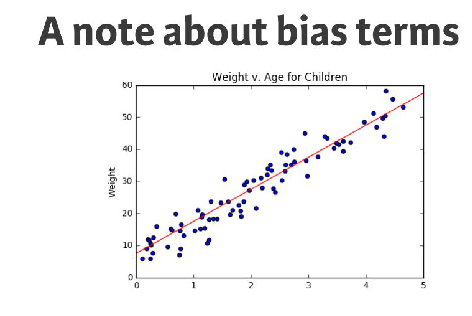

In [56]:
imagem = plt.imread(data_folder + "bias_terms.jpg")
plt.axis('off')
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.imshow(imagem)
plt.show()

Exercício 6

In [57]:
%%script false
# Which models of the data include interaction terms?

# Suppose we have two features x and y, and we use models that process the features as follows:

1. βx + βy + ββ
2. βxy + βx + βy
3. βx + βy + βx^2 + βy^2
where β is a coefficient in your model (not a feature).

Which expression(s) include interaction terms?

# Answer: 2. βxy + βx + βy

# An xy term is present, which represents interactions between features.

Couldn't find program: 'false'


Exercício 7

In [58]:
# Implement interaction modeling in scikit-learn

# Código para o SparseInteractions

from itertools import combinations

import numpy as np
from scipy import sparse
from sklearn.base import BaseEstimator, TransformerMixin


class SparseInteractions(BaseEstimator, TransformerMixin):
    def __init__(self, degree=2, feature_name_separator="_"):
        self.degree = degree
        self.feature_name_separator = feature_name_separator

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if not sparse.isspmatrix_csc(X):
            X = sparse.csc_matrix(X)

        if hasattr(X, "columns"):
            self.orig_col_names = X.columns
        else:
            self.orig_col_names = np.array([str(i) for i in range(X.shape[1])])

        spi = self._create_sparse_interactions(X)
        return spi
    
###############################################################################################

    def get_feature_names(self):
        return self.feature_names

    def _create_sparse_interactions(self, X):
        out_mat = []
        self.feature_names = self.orig_col_names.tolist()

        for sub_degree in range(2, self.degree + 1):
            for col_ixs in combinations(range(X.shape[1]), sub_degree):
                # add name for new column
                name = self.feature_name_separator.join(self.orig_col_names[list(col_ixs)])
                self.feature_names.append(name)

                # get column multiplications value
                out = X[:, col_ixs[0]]
                for j in col_ixs[1:]:
                    out = out.multiply(X[:, j])

                out_mat.append(out)

        return sparse.hstack([X] + out_mat)


In [59]:
%%script false
# Implement interaction modeling in scikit-learn

# It's time to add interaction features to your model. 
# The PolynomialFeatures object in scikit-learn does just that, but here you're going to use a custom interaction object,
# SparseInteractions. Interaction terms are a statistical tool that lets your model express what happens if two features 
# appear together in the same row.

# SparseInteractions does the same thing as PolynomialFeatures, but it uses sparse matrices to do so. 
# (o PolynomialFeatures não lida com sparse matrices, que poupam memória)

# PolynomialFeatures and SparseInteractions both take the argument degree, which tells them what polynomial degree of 
# interactions to compute.

# You're going to consider interaction terms of degree=2 in your pipeline. You will insert these steps *after the 
# preprocessing steps* you've built out so far, but *before the classifier steps*.

# isto demora por isso apresenta-se só o resultado no fim

# final pipeline
pl = Pipeline([('union', union),
               ('int', SparseInteractions(degree=2)),   ## 
               ('scale', MaxAbsScaler()),
               ('clf', OneVsRestClassifier(LogisticRegression()))
               ])


# Log loss score: 1.2256. Nice improvement from 1.2681

Couldn't find program: 'false'


#### Exercício 8 - Learning from the experts: a computational trick and the winning model

In [60]:
%%script false
#vídeo

# Learning from the expert: hashing trick

# ● Adding new features may cause enormous increase in array size

# ● Hashing is a way of increasing memory efficiency (without sacrificing too much accuracy)
#              PETRO    VEND    FUEL    AND    FLUIDS
#               2954    9384    4569    1197    8947

#   Takes an input (in this case a token) --> and outputs a hashvalue (in this case an integer)
#   --> we explicitly state how many possible outputs the hashing function may have
#   for example we may say that we will only have 250 outputs of the hash function
#   the hashing vectorizer then maps every token to one of those 250 columns
#   some columns will have multiple columns that map to them
#   interestingly, the original paper about the hashing trick demonstrates the even if 2 tokens are hashed to the same
#     value, there is very little effect on model accuracy in real world problems

# ● Hash function limits possible outputs, fixing array size

# When to use the hashing trick
# ● Want to make array of features as small as possible
#  - Dimensionality reduction
# ● Particularly useful on large datasets
#  - e.g., lots of text data!


# Implementing the hashing trick in scikit-learn
from sklearn.feature_extraction.text import HashingVectorizer          
    
    # ---> instead of using the CountVectorizer
    # Convert a collection of text documents to a matrix of token occurrences
    # It turns a collection of text documents into a scipy.sparse matrix holding token occurrence counts 
#(or binary occurrence information), possibly normalized as token frequencies if norm=’l1’ or projected on the euclidean 
#unit sphere if norm=’l2’.
# This text vectorizer implementation uses the hashing trick to find the token string name to feature integer index mapping.
    
vec = HashingVectorizer(norm=None, non_negative=True, token_pattern=TOKENS_ALPHANUMERIC, ngram_range=(1, 2))

# norm=None, non_negative=True ----> fazem com que o HashingVectorizer possa substituir o CountVectorizer

    # norm=None  --> Norm used to normalize term vectors. None for no normalization. (‘l1’, ‘l2’ or None. optional)
    # non_negative=True (default é False)  --> (deprecated, vai ser removida futuramente)
    #                                 When True, an absolute value is applied to the features matrix prior to returning it.
    
    
# The model that won it all

# ● You now know all the expert moves to make on this dataset
#  - NLP: Range of n-grams, punctuation tokenization
#  - Stats: Interaction terms
#  - Computation: Hashing trick
# ● What class of model was used?


# ● And the winning model was…

# ● Logistic regression!
#  - Carefully create features
#  - Easily implemented tricks

# ● Favor simplicity over complexity and see how far it takes you


Couldn't find program: 'false'


Exercício 9

In [61]:
%%script false
# Why is hashing a useful trick?

# A hash function takes an input, in your case a token, and outputs a hash value. 
# For example, the input may be a string and the hash value may be an integer.
# We've loaded a familiar python datatype,a dictionary called hash_dict,that makes this mapping concept a bit more explicit.
# In fact, python dictionaries ARE hash tables!

hash_dict = {'and': 780, 'fluids': 354, 'fuel': 895, 'petro': 354, 'vend': 785}

# By explicitly stating how many possible outputs the hashing function may have, we limit the size of the objects that need
# to be processed. With these limits known, computation can be made more efficient and we can get results faster, even on 
# large datasets.

# Why is hashing a useful trick?

# 3. Some problems are memory-bound and not easily parallelizable, and hashing enforces a fixed length computation 
# instead of using a mutable datatype (like a dictionary). (True)

# Yes. Enforcing a fixed length can speed up calculations drastically, especially on large datasets!

Couldn't find program: 'false'


Exercício 10

In [62]:
%%script false
# Implementing the hashing trick in scikit-learn

# In this exercise you will check out the scikit-learn implementation of HashingVectorizer before adding it to your 
# pipeline later.


# Import HashingVectorizer
from sklearn.feature_extraction.text import HashingVectorizer

# Get text data: text_data
text_data = combine_text_columns(X_train)

# Create the token pattern: TOKENS_ALPHANUMERIC
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)' 

# Instantiate the HashingVectorizer: hashing_vec
hashing_vec = HashingVectorizer(token_pattern=TOKENS_ALPHANUMERIC)

# Fit and transform the Hashing Vectorizer
hashed_text = hashing_vec.fit_transform(text_data)

# Create DataFrame and print the head
hashed_df = pd.DataFrame(hashed_text.data)
print(hashed_df.head())

###############

<script.py> output:
              0
    0 -0.160128
    1  0.160128    # hashed to the same value
    2 -0.480384
    3 -0.320256
    4  0.160128     # hashed to the same value

# As you can see, some text is hashed to the same value, but this doesn't neccessarily hurt performance.

Couldn't find program: 'false'


Exercício 11

In [63]:
%%script false
# Build the winning model ( It's time to build the model that won DrivenData's competition.)

# Import the hashing vectorizer
from sklearn.feature_extraction.text import HashingVectorizer

# Instantiate the winning model pipeline: pl
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', HashingVectorizer(token_pattern=TOKENS_ALPHANUMERIC,
                                                     non_negative=True, norm=None, binary=False,
                                                     ngram_range=(1, 2))),
                    ('dim_red', SelectKBest(chi2, chi_k))
                ]))
             ]
        )),
        ('int', SparseInteractions(degree=2)),
        ('scale', MaxAbsScaler()),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])


#  Log loss: 1.2258. 
# Looks like the performance is about the same, but this is expected since the HashingVectorizer should work the same 
# as the CountVectorizer. Try this pipeline out on the whole dataset on your local machine to see its full power!


########## OR (total) ##################################################################################################

# Import the hashing vectorizer
from sklearn.feature_extraction.text import HashingVectorizer

# Perform preprocessing
get_text_data = FunctionTransformer(combine_text_columns, validate=False)
get_numeric_data = FunctionTransformer(lambda x: x[NUMERIC_COLUMNS], validate=False)

TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'
chi_k = 300

# build the pipeline

numeric_features = Pipeline([('selector', get_numeric_data), ('imputer', Imputer())])
text_features = Pipeline([('selector', get_text_data), 
                          ('vectorizer', HashingVectorizer(token_pattern=TOKENS_ALPHANUMERIC, 
                                                           non_negative=True, norm=None, binary=False,
                                                           ngram_range=(1, 2))),
                          ('dim_red', SelectKBest(chi2, chi_k)) ])

union = FeatureUnion([('numeric_features', numeric_features), ('text_features', text_features)])

# final pipeline
pl = Pipeline([('union', union),
               ('scale', MaxAbsScaler()),
               ('clf', OneVsRestClassifier(LogisticRegression()))
               ])


Couldn't find program: 'false'


Exercício 12

In [64]:
%%script false
# What tactics got the winner the best score?

# The winner used skillful NLP, efficient computation, and simple but powerful stats tricks to master the budget data.

Couldn't find program: 'false'


### Todo o código daqui:
    
https://github.com/datacamp/course-resources-ml-with-experts-budgets/blob/master/notebooks/1.0-full-model.ipynb

#### Exercício 13 - Next steps and the social impact of your work

#vídeo

Can you do better?

* You’ve seen the flexibility of the pipeline steps
* Quickly test ways of improving your submission
  - NLP: Stemming, stop-word removal
  - Model: RandomForest, k-NN, Naïve Bayes
  - Numeric Preprocessing: Imputation strategies
  - Optimization: Grid search over pipeline objects
  - Experiment with new scikit-learn techniques

* Work with the full dataset at DrivenData!


* Other ways to use data science to have a social impact at www.drivendata.org


# Fim